In [1]:
#imports
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv", encoding = "ISO-8859-1")

In [3]:
#remove 26 columns

df = df.drop(['name', 'day', 'year','h_income', 'state', 'county_income', 'comp_income','county_bucket', 'nat_bucket', 'share_black', 'share_hispanic', 'college', 'streetaddress', 'pov', 'city', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency'], axis =1)

In [4]:
#remove rows with missing values

df = df.dropna()

In [5]:
#remove rows that have 'age' == 'Unkown', 'cause' == 'Unkown','armed' == 'Unkown', 'p_income == '-'

indexNames_age = df[df['age'] == 'Unknown' ].index
df= df.drop(index=indexNames_age)

indexNames_cause = df[df['cause'] == 'Unknown' ].index
df= df.drop(index=indexNames_cause)

indexNames_armed = df[df['armed'] == 'Unknown' ].index
df= df.drop(index=indexNames_armed)

indexNames_armed = df[df['p_income'] == '-' ].index
df= df.drop(index=indexNames_armed)

In [6]:
#change column name of 'p-income'
df = df.rename(columns = {"p_income": "income"})

In [7]:
#replace values in 'raceethnicity'
df['raceethnicity'] = df['raceethnicity'].replace(['White'],'Caucasian')
df['raceethnicity'] = df['raceethnicity'].replace(['Black'],'African American')

In [8]:
#change data type of 'age', 'p_income', and 'share_white' into numeric

df["age"] = df['age'].astype('int')
df["income"] = df['income'].astype('int')
df["share_white"] = df['share_white'].astype('float')

In [9]:
#remove outliers in 'pop' based on boxplot
indexNames_armed = df[df['pop'] > 15000 ].index
df= df.drop(index=indexNames_armed)

In [10]:
df.describe()

,age,pop,share_white,income,urate
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,37.507795,4714.706013,51.428953,24180.189310,0.118602
std,13.030375,2021.740188,29.886998,8977.243718,0.069179
min,16.000000,403.000000,0.000000,5457.000000,0.011335
25%,28.000000,3357.000000,26.100000,18174.000000,0.069404
50%,36.000000,4465.000000,55.000000,22177.000000,0.106713
75%,45.000000,5787.000000,76.900000,28490.000000,0.144498
max,87.000000,13987.000000,99.600000,86023.000000,0.507614


In [11]:
df['income'].value_counts()

21130    2
37476    2
28125    2
14256    2
16558    2
        ..
19343    1
27255    1
31930    1
20644    1
33590    1
Name: income, Length: 438, dtype: int64

In [12]:
df.dtypes

age                int32
gender            object
raceethnicity     object
month             object
cause             object
armed             object
pop                int64
share_white      float64
income             int32
urate            float64
dtype: object

<AxesSubplot:ylabel='pop'>

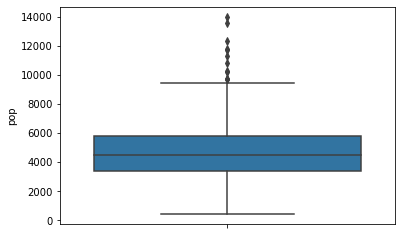

In [13]:
sns.boxplot(y='pop', data=df)

<AxesSubplot:ylabel='income'>

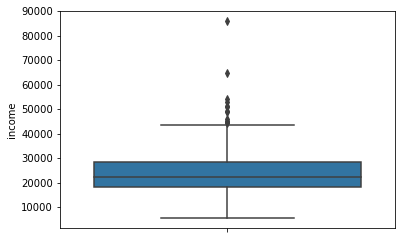

In [14]:
sns.boxplot(y='income', data=df)

<AxesSubplot:ylabel='age'>

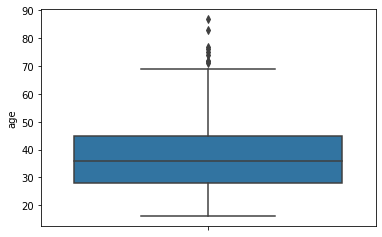

In [15]:
sns.boxplot(y='age', data=df)

In [16]:
#categorize 'age'

age_labels = [f"{i} - {i+9}" for i in range(0,80,10)]
df['age_group'] = pd.cut(df['age'], range(0, 90, 10), right=False,labels=age_labels)

#categorize 'population'
pop_labels = [f"{i} - {i+1000}" for i in range(0,27000,1000)]
df['pop_size'] = pd.cut(df['pop'], range(0, 28000, 1000), right=False, labels=pop_labels)

#categorize 'income'
income_labels = [f"{i} - {i+1000}" for i in range(5000,87000,1000)]
df['income_bracket'] = pd.cut(df['income'], range(5000,88000,1000), right=False, labels=income_labels)

#categorize 'share_white'
SW_labels = ['Low', 'Medium', 'Half', 'High', 'Very High']
df['SW_level'] = pd.qcut(x = df['share_white'], q= 5, precision = 1, labels=SW_labels)

In [17]:
#reset index
df.reset_index(drop=True) 

,age,gender,raceethnicity,month,cause,armed,pop,share_white,income,urate,age_group,pop_size,income_bracket,SW_level
0,16,Male,African American,February,Gunshot,No,3779,60.5,28375,0.097686,10 - 19,3000 - 4000,28000 - 29000,Half
1,27,Male,Caucasian,April,Gunshot,No,2769,53.8,14678,0.065724,20 - 29,2000 - 3000,14000 - 15000,Half
2,26,Male,Caucasian,March,Gunshot,No,4079,73.8,25286,0.166293,20 - 29,4000 - 5000,25000 - 26000,High
3,25,Male,Hispanic/Latino,March,Gunshot,Firearm,4343,1.2,17194,0.124827,20 - 29,4000 - 5000,17000 - 18000,Low
4,29,Male,Caucasian,March,Gunshot,No,6809,92.5,33954,0.063550,20 - 29,6000 - 7000,33000 - 34000,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,18,Male,African American,April,Gunshot,No,1640,40.9,25262,0.152047,10 - 19,1000 - 2000,25000 - 26000,Medium
445,28,Male,Native American,April,Taser,Firearm,4154,74.5,18470,0.133650,20 - 29,4000 - 5000,18000 - 19000,High
446,52,Male,Caucasian,March,Gunshot,Firearm,3850,83.2,21175,0.256150,50 - 59,3000 - 4000,21000 - 22000,Very High
447,38,Female,African American,February,Gunshot,Firearm,2544,21.7,26971,0.069601,30 - 39,2000 - 3000,26000 - 27000,Medium


In [18]:
#method chain 1 (load and Clean data - remove columns and rows, rename columns, deal with missing data, and format data)

df1 = (
    pd.read_csv("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv", encoding = "ISO-8859-1")
    .drop(['name', 'day', 'year','h_income', 'state', 'county_income', 'comp_income','county_bucket', 'nat_bucket', 'share_black', 'share_hispanic', 'college', 'streetaddress', 'pov', 'city', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency'], axis =1)
    .rename(columns={"p_income": "income"})
    .dropna()
    .query("age != 'Unknown' & cause != 'Unknown' & armed != 'Unknown' & income != '-'")  
)
df1['age'] = pd.to_numeric(df1['age'])
df1['income'] = pd.to_numeric(df1['income'])
df1['share_white'] = pd.to_numeric(df1['share_white'])

In [19]:
#method chain 2 (Process Data - deal with outliers, create new columns, and replace values)

age_labels = [f"{i} - {i+9}" for i in range(0,80,10)]
pop_labels = [f"{i} - {i+1000}" for i in range(0,13000,1000)]
income_labels = [f"{i} - {i+1000}" for i in range(5000,87000,1000)]
SW_labels = ['Low', 'Medium', 'Half', 'High', 'Very High']
df2 =(
    df1
    .query("pop < 15000")
    .assign(age_group = lambda x: pd.cut(x['age'], range(0, 90, 10), right=False,labels=age_labels))
    .assign(pop_group = lambda df: pd.cut(df['pop'], range(0, 14000, 1000), right=False, labels=pop_labels))
    .assign(income_bracket = lambda df:pd.cut(df['income'], range(5000,88000,1000), right=False, labels=income_labels))
    .assign(SW_category = lambda df:pd.qcut(x = df['share_white'], q= 5, precision = 1, labels=SW_labels))
    .reset_index(drop=True) 
    .replace('White','Caucasian')
    .replace('Black','African American')
)
df2

,age,gender,raceethnicity,month,cause,armed,pop,share_white,income,urate,age_group,pop_group,income_bracket,SW_category
0,16,Male,African American,February,Gunshot,No,3779,60.5,28375,0.097686,10 - 19,3000 - 4000,28000 - 29000,Half
1,27,Male,Caucasian,April,Gunshot,No,2769,53.8,14678,0.065724,20 - 29,2000 - 3000,14000 - 15000,Half
2,26,Male,Caucasian,March,Gunshot,No,4079,73.8,25286,0.166293,20 - 29,4000 - 5000,25000 - 26000,High
3,25,Male,Hispanic/Latino,March,Gunshot,Firearm,4343,1.2,17194,0.124827,20 - 29,4000 - 5000,17000 - 18000,Low
4,29,Male,Caucasian,March,Gunshot,No,6809,92.5,33954,0.063550,20 - 29,6000 - 7000,33000 - 34000,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,18,Male,African American,April,Gunshot,No,1640,40.9,25262,0.152047,10 - 19,1000 - 2000,25000 - 26000,Medium
445,28,Male,Native American,April,Taser,Firearm,4154,74.5,18470,0.133650,20 - 29,4000 - 5000,18000 - 19000,High
446,52,Male,Caucasian,March,Gunshot,Firearm,3850,83.2,21175,0.256150,50 - 59,3000 - 4000,21000 - 22000,Very High
447,38,Female,African American,February,Gunshot,Firearm,2544,21.7,26971,0.069601,30 - 39,2000 - 3000,26000 - 27000,Medium


In [20]:
def load_and_process(url_or_path_to_csv_file):
    
    #method chain 1 (load and Clean data - remove columns and rows, rename columns, deal with missing data, and format data)

    df1 = (
        pd.read_csv("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv", encoding = "ISO-8859-1")
        .drop(['name', 'day', 'year','h_income', 'state', 'county_income', 'comp_income','county_bucket', 'nat_bucket', 'share_black', 'share_hispanic', 'college', 'streetaddress', 'pov', 'city', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency'], axis =1)
        .rename(columns={"p_income": "income"})
        .dropna()
        .query("age != 'Unknown' & cause != 'Unknown' & armed != 'Unknown' & income != '-'")
    )
    df1['age'] = pd.to_numeric(df1['age'])
    df1['income'] = pd.to_numeric(df1['income'])
    df1['share_white'] = pd.to_numeric(df1['share_white'])
    
    #method chain 2 (Process Data - deal with outliers, create new columns, and replace values)

    age_labels = [f"{i} - {i+9}" for i in range(0,80,10)]
    pop_labels = [f"{i} - {i+1000}" for i in range(0,13000,1000)]
    income_labels = [f"{i} - {i+1000}" for i in range(5000,87000,1000)]
    SW_labels = ['Low', 'Medium', 'Half', 'High', 'Very High']
    df2 =(
        df1
        .query("pop < 15000")
        .assign(age_group = lambda x: pd.cut(x['age'], range(0, 90, 10), right=False,labels=age_labels))
        .assign(pop_group = lambda df: pd.cut(df['pop'], range(0, 14000, 1000), right=False, labels=pop_labels))
        .assign(income_bracket = lambda df:pd.cut(df['income'], range(5000,88000,1000), right=False, labels=income_labels))
        .assign(SW_category = lambda df:pd.qcut(x = df['share_white'], q= 5, precision = 1, labels=SW_labels))
        .reset_index(drop=True) 
        .replace('White','Caucasian')
        .replace('Black','African American')
    )
    return df2

In [21]:
load_and_process("C:/Users/serav/Documents/UBC/SUMMER 2021/TERM 2/DATA 301/project-group-30/data/raw/police_killings.csv")

,age,gender,raceethnicity,month,cause,armed,pop,share_white,income,urate,age_group,pop_group,income_bracket,SW_category
0,16,Male,African American,February,Gunshot,No,3779,60.5,28375,0.097686,10 - 19,3000 - 4000,28000 - 29000,Half
1,27,Male,Caucasian,April,Gunshot,No,2769,53.8,14678,0.065724,20 - 29,2000 - 3000,14000 - 15000,Half
2,26,Male,Caucasian,March,Gunshot,No,4079,73.8,25286,0.166293,20 - 29,4000 - 5000,25000 - 26000,High
3,25,Male,Hispanic/Latino,March,Gunshot,Firearm,4343,1.2,17194,0.124827,20 - 29,4000 - 5000,17000 - 18000,Low
4,29,Male,Caucasian,March,Gunshot,No,6809,92.5,33954,0.063550,20 - 29,6000 - 7000,33000 - 34000,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,18,Male,African American,April,Gunshot,No,1640,40.9,25262,0.152047,10 - 19,1000 - 2000,25000 - 26000,Medium
445,28,Male,Native American,April,Taser,Firearm,4154,74.5,18470,0.133650,20 - 29,4000 - 5000,18000 - 19000,High
446,52,Male,Caucasian,March,Gunshot,Firearm,3850,83.2,21175,0.256150,50 - 59,3000 - 4000,21000 - 22000,Very High
447,38,Female,African American,February,Gunshot,Firearm,2544,21.7,26971,0.069601,30 - 39,2000 - 3000,26000 - 27000,Medium
